In [1]:
# Import packages
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS

In [2]:
# import housing data
df_all = pd.read_csv('data/kc_house_data.csv')
df_all.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
# clean data--convert "NaN" to 0 and replace "?" with 0
df_all = df_all.fillna(0).replace('?',0)
df_all.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850,3,1.50,1060,9711,1.0,0.0,0.0,...,7,1060,0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
# want to look at houses with two bedrooms or less
df = df_all[(df_all['bedrooms'] <= 2)] 
df.info

<bound method DataFrame.info of                id        date   price  bedrooms  bathrooms  sqft_living  \
2      5631500400   2/25/2015  180000         2       1.00          770   
11     9212900260   5/27/2014  468000         2       1.00         1160   
18       16000397   12/5/2014  189000         2       1.00         1200   
23     8091400200   5/16/2014  252700         2       1.50         1070   
31     2426039314   12/1/2014  280000         2       1.50         1190   
...           ...         ...     ...       ...        ...          ...   
21570  2767604724  10/15/2014  505000         2       2.50         1430   
21572  2767600688  11/13/2014  414500         2       1.50         1210   
21579  1972201967  10/31/2014  520000         2       2.25         1530   
21594  1523300141   6/23/2014  402101         2       0.75         1020   
21596  1523300157  10/15/2014  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  

<AxesSubplot:xlabel='id', ylabel='price'>

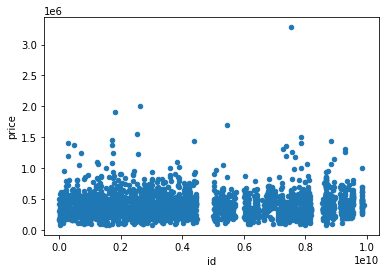

In [5]:
# want to look at price range
df.plot(kind='scatter', x='id', y='price')

In [6]:
# limit price range to less than $2 mill to remove obvious outlier
df = df[(df['price'] <= 2000000)]
df.info

<bound method DataFrame.info of                id        date   price  bedrooms  bathrooms  sqft_living  \
2      5631500400   2/25/2015  180000         2       1.00          770   
11     9212900260   5/27/2014  468000         2       1.00         1160   
18       16000397   12/5/2014  189000         2       1.00         1200   
23     8091400200   5/16/2014  252700         2       1.50         1070   
31     2426039314   12/1/2014  280000         2       1.50         1190   
...           ...         ...     ...       ...        ...          ...   
21570  2767604724  10/15/2014  505000         2       2.50         1430   
21572  2767600688  11/13/2014  414500         2       1.50         1210   
21579  1972201967  10/31/2014  520000         2       2.25         1530   
21594  1523300141   6/23/2014  402101         2       0.75         1020   
21596  1523300157  10/15/2014  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  

In [7]:
# function to create GeoDataFrame
def add_geo_col(df):
    # create a geometry column 
    geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]

    # Coordinate reference system : WGS84 (the GPS model for conversion)
    crs = CRS('epsg:4326')

    # Creating a Geographic data frame 
    gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry).reset_index()
    return gdf

In [8]:
gdf = add_geo_col(df)
gdf.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,2,5631500400,2/25/2015,180000,2,1.0,770,10000,1.0,0.0,...,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,POINT (-122.23300 47.73790)
1,11,9212900260,5/27/2014,468000,2,1.0,1160,6000,1.0,0.0,...,860,300,1942,0.0,98115,47.6900,-122.292,1330,6000,POINT (-122.29200 47.69000)
2,18,16000397,12/5/2014,189000,2,1.0,1200,9850,1.0,0.0,...,1200,0,1921,0.0,98002,47.3089,-122.210,1060,5095,POINT (-122.21000 47.30890)
3,23,8091400200,5/16/2014,252700,2,1.5,1070,9643,1.0,0.0,...,1070,0,1985,0.0,98030,47.3533,-122.166,1220,8386,POINT (-122.16600 47.35330)
4,31,2426039314,12/1/2014,280000,2,1.5,1190,1265,3.0,0.0,...,1190,0,2005,0.0,98133,47.7274,-122.357,1390,1756,POINT (-122.35700 47.72740)


<AxesSubplot:>

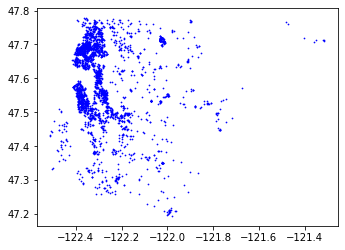

In [9]:
# Plot all points
gdf.plot(marker='o', color='b', markersize=0.5)

In [10]:
# check what projection is used
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# function to convert meters to miles
def m_2_mi(meters): 
    return meters * 0.00062137

In [12]:
# function to find distance between two Points
def dist_to_point(point1, point2):
    pt1_gdf = gpd.GeoSeries([point1], crs=4326)
    pt2_gdf = gpd.GeoSeries([point2], crs=4326)
    pt1_gdf = pt1_gdf.to_crs(3857)
    pt2_gdf = pt2_gdf.to_crs(3857)
    distance = m_2_mi(pt1_gdf.distance(pt2_gdf))
    return round(distance.at[0], 3)

In [13]:
# Want to compile list of top 5 employers in Seattle area with a centralized campus
# Source is https://www.huduser.gov/portal/publications/pdf/SeattleWA-CHMA-19.pdf
df_top10_employers = pd.read_csv('data/top_employers.csv')
df_central5 = df_top10_employers[df_top10_employers['centralized_campus']=='y'].reset_index()
df_central5 = add_geo_col(df_central5)
df_central5

,level_0,index,rank,employer,no_employees,long,lat,centralized_campus,geometry
0,0,0,1,The Boeing Company,"64,300",-122.312023,47.532685,y,POINT (-122.31202 47.53269)
1,1,1,2,"Amazon.com, Inc.","45,000",-122.339688,47.615875,y,POINT (-122.33969 47.61588)
2,2,2,3,Microsoft Corporation,"43,031",-122.339688,47.645744,y,POINT (-122.33969 47.64574)
3,3,3,4,University of Washington,"30,200",-122.303644,47.655544,y,POINT (-122.30364 47.65554)
4,4,7,8,Starbucks Corporation,"11,239",-122.336000,47.580700,y,POINT (-122.33600 47.58070)


In [14]:
# function to find the average distance of a house to the top 5 employers
def avg_dists(point1, gdf): 
    dists = [dist_to_point(point1, point2) for point2 in gdf['geometry']]
    avg = sum(dists)/len(dists)
    return avg

In [15]:
downtown = Point(-122.3344, 47.6050) # coordinates for center of downtown Seattle

# Calculate average distance of each property to central downtown
gdf['dist_2_downtown'] = [dist_to_point(point, downtown) for point in gdf['geometry']]

In [16]:
# Calculate average distance of each property to the top 5 employers
gdf['avg_dists'] = [avg_dists(point, df_central5) for point in gdf['geometry']]

In [17]:
gdf.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry,dist_2_downtown,avg_dists
0,2,5631500400,2/25/2015,180000,2,1.0,770,10000,1.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,POINT (-122.23300 47.73790),15.348,15.1470
1,11,9212900260,5/27/2014,468000,2,1.0,1160,6000,1.0,0.0,...,1942,0.0,98115,47.6900,-122.292,1330,6000,POINT (-122.29200 47.69000),9.207,9.0734
2,18,16000397,12/5/2014,189000,2,1.0,1200,9850,1.0,0.0,...,1921,0.0,98002,47.3089,-122.210,1060,5095,POINT (-122.21000 47.30890),31.490,31.4850
3,23,8091400200,5/16/2014,252700,2,1.5,1070,9643,1.0,0.0,...,1985,0.0,98030,47.3533,-122.166,1220,8386,POINT (-122.16600 47.35330),28.271,28.2188
4,31,2426039314,12/1/2014,280000,2,1.5,1190,1265,3.0,0.0,...,2005,0.0,98133,47.7274,-122.357,1390,1756,POINT (-122.35700 47.72740),12.669,12.7216


In [18]:
gdf.to_pickle('data/geodata.pkl')